In [3]:
from numpy import *
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

# GroupBy技术

分组运算的基本流程： 拆分(split)-应用(apply)-合并(combine)  
- 拆分是在对象的特定轴上执行。例如Dataframe可以行（axis=0)和列（axis=1)上进行分组  
- 然后将一个函数应用（apply）到各个分组产生新值
- 最后，所有这些函数的执行结果会被合并（combine）到最终的结果对象中
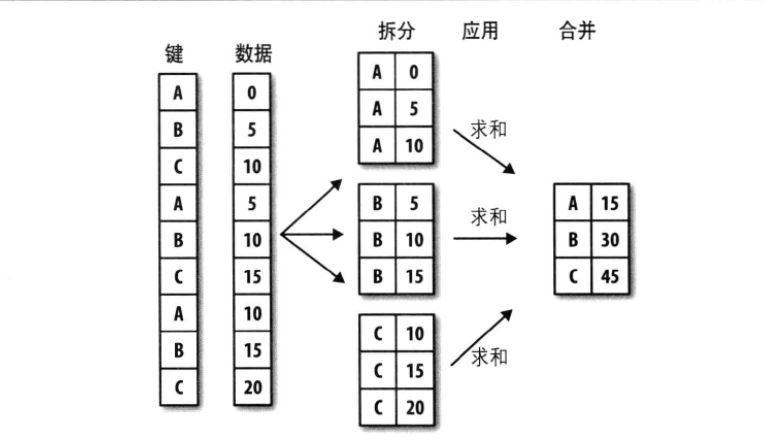

In [23]:
df = DataFrame({'key1':['a','a','b','b','a'],
               'key2':['one','two','one','two','one'],
               'data1':np.random.randn(5),
               'daa2':np.random.randn(5)})

In [24]:
df

,daa2,data1,key1,key2
0,0.939959,-0.468810,a,one
1,-1.206593,0.383294,a,two
2,1.152155,-2.233133,b,one
3,0.183005,-0.964448,b,two
4,-1.090451,-0.673205,a,one


In [9]:
# 一个键
grouped = df['data1'].groupby(df['key1'])
grouped

In [10]:
grouped.mean()

key1
a    1.04452
b    0.73016
Name: data1, dtype: float64

In [12]:
# 多个键
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     1.208944
      two     0.715673
b     one     0.220938
      two     1.239383
Name: data1, dtype: float64

In [14]:
# 将一个行索引转转为列索引
means.unstack()

key2,one,two
key1,,
a,1.208944,0.715673
b,0.220938,1.239383


In [15]:
# 分组键除了Series外，还可以是任何长度适当的数组：
states = np.array(['Ohio','California','California','Ohio','Ohio'])
years = np.array([2005,2005,2006,2005,2006])
df['data1'].groupby([states,years]).mean()

California  2005    0.715673
            2006    0.220938
Ohio        2005    1.089683
            2006    1.477903
Name: data1, dtype: float64

In [16]:
# 其他的写法，列名用作分组键
df.groupby('key1').mean()  

,daa2,data1
key1,,
a,0.379051,1.04452
b,0.502929,0.73016


注意到，结果没有key2列。因为该列不是数值数据，所以从结果中删除了。默认情况下，虽然所有数据列都会被聚合，但有时只返回一个**子集**。

In [17]:
# 返回各个分组大小
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

**Tips : 分组键中的缺失值会被排除在结果之外。**如下例所示

In [29]:
df.iloc[4,3]=np.nan
df

,daa2,data1,key1,key2
0,0.939959,-0.468810,a,one
1,-1.206593,0.383294,a,two
2,1.152155,-2.233133,b,one
3,0.183005,-0.964448,b,two
4,-1.090451,-0.673205,a,NaN


In [31]:
df['data1'].groupby(df['key2']).size()

key2
one    2
two    2
dtype: int64

## 对分组进行迭代

In [33]:
df = DataFrame({'key1':['a','a','b','b','a'],
               'key2':['one','two','one','two','one'],
               'data1':np.random.randn(5),
               'daa2':np.random.randn(5)})
df.groupby('key1')

In [35]:
# df.groupby('key1') 是一个可迭代的对象
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
       daa2     data1 key1 key2
0 -1.642162  0.295352    a  one
1 -1.016587 -0.637693    a  two
4 -0.751615 -1.247095    a  one
b
       daa2     data1 key1 key2
2  0.782789  0.482642    b  one
3 -0.343028  1.179290    b  two


In [36]:
# 对于多重键的情况，元组的第一个元素将会是由键值组成的元组
for (k1,k2),group in df.groupby(['key1','key2']):
    print(k1,k2)
    print(group)

a one
       daa2     data1 key1 key2
0 -1.642162  0.295352    a  one
4 -0.751615 -1.247095    a  one
a two
       daa2     data1 key1 key2
1 -1.016587 -0.637693    a  two
b one
       daa2     data1 key1 key2
2  0.782789  0.482642    b  one
b two
       daa2    data1 key1 key2
3 -0.343028  1.17929    b  two


groupby默认是在axis=0上进行分组，通过设置也可以在其他任何轴上进行分组。  
比如下例可以根据dtype对列进行分组。

In [38]:
df.dtypes

daa2     float64
data1    float64
key1      object
key2      object
dtype: object

In [40]:
grouped = df.groupby(df.dtypes,axis=1)
dict(list(grouped))

{dtype('float64'):        daa2     data1
 0 -1.642162  0.295352
 1 -1.016587 -0.637693
 2  0.782789  0.482642
 3 -0.343028  1.179290
 4 -0.751615 -1.247095, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

## 选取一个或一组列
对于由DataFrame产生的Groupby对象，如果用一个或一组列名对其进行索引，就能实现选取部分列进行聚合的目的。  
也就是说：
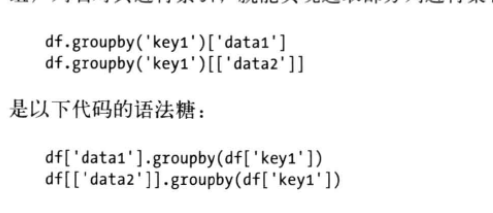

In [41]:
df.groupby(['key1','key2'])[['daa2']].mean()

daa2
key1 key2          
a    one  -1.196888
     two  -1.016587
b    one   0.782789
     two  -0.343028

## 通过字典进行分组

In [46]:
people = DataFrame(np.random.randn(5,5),
                  columns = ['a','b','c','d','e'],
                  index = ['Joe','Steve','Mars','Mary','Joffery'])
people.ix[2,['b','c']]=np.nan
people

,a,b,c,d,e
Joe,0.210798,0.281995,-0.399790,-0.455874,0.217886
Steve,-0.512471,-1.974379,-1.053528,0.287047,1.310062
Mars,0.336454,NaN,NaN,0.720491,-0.315444
Mary,0.668769,-1.381829,-0.510568,-0.059219,0.046354
Joffery,1.260462,0.812848,-0.667288,0.418716,0.424701


In [47]:
# 已知原列到新列的字典映射
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}
by_columns = people.groupby(mapping,axis=1)
by_columns.sum()

,blue,red
Joe,-0.855665,0.710679
Steve,-0.766482,-1.176788
Mars,0.720491,0.021010
Mary,-0.569787,-0.666706
Joffery,-0.248572,2.498011


##  通过函数进行分组
任何被当做分组键的函数都会在各个索引值上被调用一次。  
假设我们希望根据人名的长度进行分组，仅需要传入len函数即可：

In [48]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.210798,0.281995,-0.399790,-0.455874,0.217886
4,1.005223,-1.381829,-0.510568,0.661272,-0.269090
5,-0.512471,-1.974379,-1.053528,0.287047,1.310062
7,1.260462,0.812848,-0.667288,0.418716,0.424701


函数、列表、字典、Series可以混合使用，因为最终都会被转成数组

In [50]:
key_list = ['one','one','one','two','two']
people.groupby([len,key_list]).min()

a         b         c         d         e
3 one  0.210798  0.281995 -0.399790 -0.455874  0.217886
4 one  0.336454       NaN       NaN  0.720491 -0.315444
  two  0.668769 -1.381829 -0.510568 -0.059219  0.046354
5 one -0.512471 -1.974379 -1.053528  0.287047  1.310062
7 two  1.260462  0.812848 -0.667288  0.418716  0.424701

##  自定义数据聚合函数

In [51]:
df

,daa2,data1,key1,key2
0,-1.642162,0.295352,a,one
1,-1.016587,-0.637693,a,two
2,0.782789,0.482642,b,one
3,-0.343028,1.179290,b,two
4,-0.751615,-1.247095,a,one


In [52]:
# 自定义聚合函数,使用aggregate或agg函数
def peak_to_peak(arr):
    return arr.max()-arr.min()

In [54]:
grouped = df.groupby('key1') 
grouped.agg(peak_to_peak)

,daa2,data1
key1,,
a,0.890547,1.542446
b,1.125818,0.696649


**根据自己定义的函数对分组进行运算**

In [55]:
grouped.describe()

daa2     data1
key1                          
a    count  3.000000  3.000000
     mean  -1.136788 -0.529812
     std    0.457280  0.776862
     min   -1.642162 -1.247095
     25%   -1.329374 -0.942394
     50%   -1.016587 -0.637693
     75%   -0.884101 -0.171171
     max   -0.751615  0.295352
b    count  2.000000  2.000000
     mean   0.219880  0.830966
     std    0.796073  0.492605
     min   -0.343028  0.482642
     25%   -0.061574  0.656804
     50%    0.219880  0.830966
     75%    0.501335  1.005128
     max    0.782789  1.179290

其他函数：
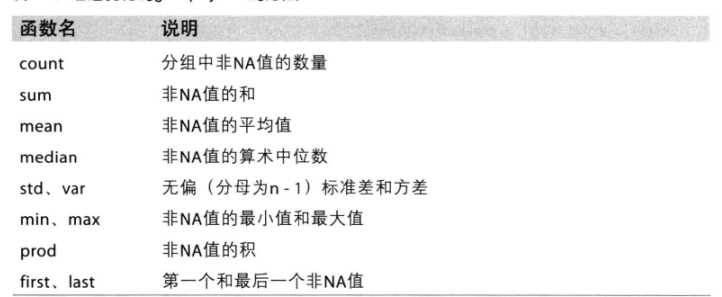

## case: 餐馆小费分析

In [67]:
tips = pd.read_csv('D:/资料/python资料/利用Python进行数据分析/ch08/tips.csv')

# 增加小费比例列
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


之前的例子中，使用aggregate自定义函数或者mean，std，sum等方法进行聚合计算。但是，我们也可能希望对不同的列使用不同的聚合函数或者一次应用多个函数。

In [68]:
grouped = tips.groupby(['sex','smoker'])

In [69]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [70]:
# 一次调用多个函数
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [71]:
# 对不同列调用不同的函数,使用字典
grouped.agg({'tip':np.max,'size':'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [72]:
grouped.agg({'tip_pct':['max','min','mean','std'],
             'size':'sum'})

size   tip_pct                              
               sum       max       min      mean       std
sex    smoker                                             
Female No      140  0.252672  0.056797  0.156921  0.036421
       Yes      74  0.416667  0.056433  0.182150  0.071595
Male   No      263  0.291990  0.071804  0.160669  0.041849
       Yes     150  0.710345  0.035638  0.152771  0.090588

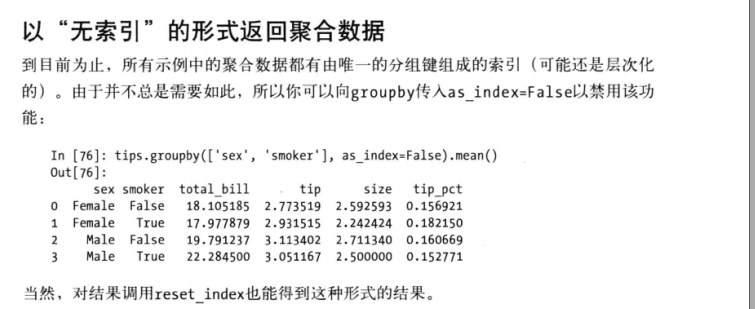
**应该不太会用到，还是记录下**

## 分组级运算和转换 

In [73]:
df

,daa2,data1,key1,key2
0,-1.642162,0.295352,a,one
1,-1.016587,-0.637693,a,two
2,0.782789,0.482642,b,one
3,-0.343028,1.179290,b,two
4,-0.751615,-1.247095,a,one


**为数据库添加一个用于存放个索引分组平均值的列**

In [74]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_daa2,mean_data1
key1,,
a,-1.136788,-0.529812
b,0.219880,0.830966


In [75]:
pd.merge(df,k1_means,left_on='key1',right_index=True)

,daa2,data1,key1,key2,mean_daa2,mean_data1
0,-1.642162,0.295352,a,one,-1.136788,-0.529812
1,-1.016587,-0.637693,a,two,-1.136788,-0.529812
4,-0.751615,-1.247095,a,one,-1.136788,-0.529812
2,0.782789,0.482642,b,one,0.219880,0.830966
3,-0.343028,1.179290,b,two,0.219880,0.830966


更加灵活的方法，transform方法

In [76]:
key = ['one','two','one','two','one']
people.groupby(key).mean()

,a,b,c,d,e
one,0.602571,0.547422,-0.533539,0.227777,0.109048
two,0.078149,-1.678104,-0.782048,0.113914,0.678208


In [80]:
people.groupby(key).mean()

,a,b,c,d,e
one,0.602571,0.547422,-0.533539,0.227777,0.109048
two,0.078149,-1.678104,-0.782048,0.113914,0.678208


In [77]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,0.602571,0.547422,-0.533539,0.227777,0.109048
Steve,0.078149,-1.678104,-0.782048,0.113914,0.678208
Mars,0.602571,0.547422,-0.533539,0.227777,0.109048
Mary,0.078149,-1.678104,-0.782048,0.113914,0.678208
Joffery,0.602571,0.547422,-0.533539,0.227777,0.109048


自定义函数

In [78]:
def demean(arr):
    return arr-arr.mean()  # 距平化函数 （demeaning function）

In [79]:
demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,-0.391774,-0.265426,0.133749,-0.683652,0.108838
Steve,-0.590620,-0.296275,-0.271480,0.173133,0.631854
Mars,-0.266117,NaN,NaN,0.492713,-0.424492
Mary,0.590620,0.296275,0.271480,-0.173133,-0.631854
Joffery,0.657891,0.265426,-0.133749,0.190939,0.315653


**Tips: **分组距平化操作还可以通过apply函数实现

## apply:更具一般性的“拆分-应用-合并”操作 
aggregate和transfrom函数只能产生两种结果：
 - 一个可以广播的标量（np.mean）
 - 一个相同大小的结果数组  
 apply方法更具一般性，会先将待处理的对象拆分成多个片段，然后对各片段调用传入的函数，最后再将各片段组合在一起

假设要根据分组选出最高的5个tip_pct值，首先编写一个函数，可以指定列找出最大值，然后把这个值所在的行选取出来

In [92]:
def top(df,n=5,column = 'tip_pct'):
    return df.sort_values(by=column)[-n:]   # sort_index在未来的版本将被替换为sort_values

In [93]:
top(tips,n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [94]:
# 对smoker分组，并用该函数调用apply
tips.groupby('smoker').apply(top) 

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [101]:
tips.groupby('smoker').agg(np.mean)

,total_bill,tip,size,tip_pct
smoker,,,,
No,19.188278,2.991854,2.668874,0.159328
Yes,20.756344,3.008710,2.408602,0.163196


In [103]:
tips.groupby('smoker').transform(np.mean).head(5)

,total_bill,tip,size,tip_pct
0,19.188278,2.991854,2.668874,0.159328
1,19.188278,2.991854,2.668874,0.159328
2,19.188278,2.991854,2.668874,0.159328
3,19.188278,2.991854,2.668874,0.159328
4,19.188278,2.991854,2.668874,0.159328


In [104]:
tips.groupby('smoker').apply(np.mean)  # 可代替agg的用法

,total_bill,tip,size,tip_pct
smoker,,,,
No,19.188278,2.991854,2.668874,0.159328
Yes,20.756344,3.008710,2.408602,0.163196


实际上，tips.groupby('smoker').describe()相当于：  
       f = lambda x: x.describe()  
       grouped.apply(f)

##  分位数和桶分析

In [108]:
frame = DataFrame({'data1':np.random.randn(1000),
                  'data2':np.random.randn(1000)})

factor = pd.cut(frame.data1,4)

In [109]:
factor.head(5)

0     (-0.204, 1.568]
1    (-1.977, -0.204]
2    (-1.977, -0.204]
3    (-1.977, -0.204]
4    (-1.977, -0.204]
Name: data1, dtype: category
Categories (4, object): [(-3.756, -1.977] < (-1.977, -0.204] < (-0.204, 1.568] < (1.568, 3.341]]

由cut返回的factor对象可以直接用于groupby。因此，我们可以像下面这样对data2统计分析

In [110]:
def get_stats(group):
    return {'min':group.min(),'max':group.max(),
           'count':group.count(),'mean':group.mean()}

In [111]:
grouped = frame.data2.groupby(factor)
grouped

In [113]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-3.756, -1.977]",28.0,1.793290,0.002220,-2.142518
"(-1.977, -0.204]",390.0,3.734470,-0.064410,-2.365480
"(-0.204, 1.568]",524.0,3.334234,-0.076612,-3.042874
"(1.568, 3.341]",58.0,2.578810,0.158762,-2.349717


In [117]:
# 返回分位数编号
grouping = pd.qcut(frame.data1,10,labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.384843,0.007329,-2.432900
1,100.0,3.070048,-0.041486,-2.809508
2,100.0,3.334234,0.216353,-2.532945
3,100.0,2.322215,-0.158005,-3.042874
4,100.0,1.961600,-0.057163,-2.359488
5,100.0,2.747153,-0.233708,-2.955118
6,100.0,2.321590,0.048045,-2.345006
7,100.0,2.100024,-0.088198,-2.867784
8,100.0,3.734470,-0.201509,-2.665059


## case: 用特定于分组的值填充缺失值

对于缺失值，有时我们希望会用dropna将其过滤，而有时则可能会希望用一个固定的值或由数据集本身所衍生出来的值去填充NA值，这时就得使用fillna这个方法了。下面例子使用平均值填充NA值

In [118]:
s = Series(np.random.randn(6))

In [119]:
s[::2]=np.nan
s

0         NaN
1    0.039405
2         NaN
3   -1.647856
4         NaN
5   -0.425362
dtype: float64

In [120]:
s.fillna(s.mean())

0   -0.677938
1    0.039405
2   -0.677938
3   -1.647856
4   -0.677938
5   -0.425362
dtype: float64

假设需要对不同的分组填充不同的值。则需要将数据分组，然后使用apply和fillna方法即可

In [122]:
states = {'Ohio','New York','Vermont','Florida','Oregon','Nevada',
          'California','Idaho'}
group_key = ['East']*4 + ['West']*4

In [127]:
data = Series(np.random.randn(8),index = states)
data[['Vermont','Idaho','Nevada']]=np.nan
data

Ohio         -1.261228
Vermont            NaN
California    1.365645
New York      0.001341
Florida      -0.289759
Idaho              NaN
Nevada             NaN
Oregon        0.589561
dtype: float64

In [128]:
data.groupby(group_key).mean()

East    0.035253
West    0.149901
dtype: float64

In [129]:
#用分组平均值填充NA值
fill_mean = lambda x:x.fillna(x.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -1.261228
Vermont       0.035253
California    1.365645
New York      0.001341
Florida      -0.289759
Idaho         0.149901
Nevada        0.149901
Oregon        0.589561
dtype: float64

In [130]:
# 此外，也可以通过字典，在代码中预定填充值
fill_values = {'East':0.5,'West':-1}
fill_func = lambda x:x.fillna(fill_values[x.name])
data.groupby(group_key).apply(fill_func)

Ohio         -1.261228
Vermont       0.500000
California    1.365645
New York      0.001341
Florida      -0.289759
Idaho        -1.000000
Nevada       -1.000000
Oregon        0.589561
dtype: float64

## case: 随机采样和排列
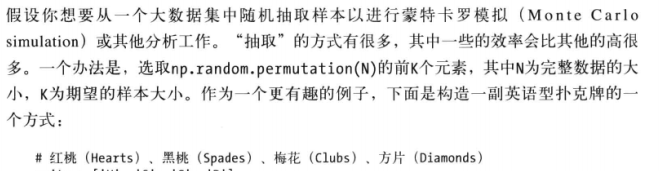

In [137]:
suits = ['H','S','C','D']
card_val = (list(range(1,11)) + [10]*3) * 4
base_names=['A']+list(range(2,11))+['J','K','Q']
cards = []
for suit in suits:
    cards.extend(str(num)+suit for num in base_names)
deck = Series(card_val,index=cards)
deck[:5]

AH    1
2H    2
3H    3
4H    4
5H    5
dtype: int64

In [138]:
# 现在从整副牌中抽出5张
def draw(deck,n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

In [139]:
draw(deck)

4D     4
6C     6
5C     5
JC    10
7D     7
dtype: int64

In [142]:
# 假设需要从每种花色中随机抽取两张牌。 花色是牌名的最后一个字母
get_suit = lambda card:card[-1]
deck.groupby(get_suit).apply(draw,n=2)  #默认是根据行索引进行分组

C  5C     5
   6C     6
D  8D     8
   3D     3
H  4H     4
   8H     8
S  7S     7
   JS    10
dtype: int64

In [143]:
deck.groupby(get_suit,group_keys=False).apply(draw,n=2)

QC    10
7C     7
5D     5
3D     3
AH     1
9H     9
KS    10
5S     5
dtype: int64

## case:计算加权平均和相关系数

In [145]:
df = DataFrame({'category':['a','a','a','a','b','b','b','b'],
               'data':np.random.randn(8),
               'weights':np.random.rand(8)})
df

,category,data,weights
0,a,-0.443817,0.323628
1,a,1.559075,0.029918
2,a,0.633083,0.023279
3,a,-0.979353,0.309995
4,b,1.525039,0.310398
5,b,1.876309,0.680080
6,b,1.029394,0.429932
7,b,-0.622975,0.632906


In [147]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'],weights=g['weights'])
grouped.apply(get_wavg)

category
a   -0.561783
b    0.875508
dtype: float64

## case:面向分组的线性回归

In [149]:
import statsmodels.api as sm

In [150]:
# 函数：对各个数据块执行普通最小二乘法（OLS）回归
def regress(data,yvar,xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1
    result = sm.OLS(Y,X).fit()
    return result.params

In [154]:
#  载入数据及预处理： 标准普尔500指数数据集（SPX字段）和几只股票的收盘价
close_px = pd.read_csv('D:/资料/python资料/利用Python进行数据分析/ch09/stock_px.csv',
                       parse_dates=True,index_col=0)  # parse_dates 解析日期型，index_col设置索引列
close_px.head(5)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [157]:
close_px.pct_change().head(5)

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086


In [155]:
# 计算由日收益（通过百分数变化计算）与SPX之间的相关系数
rets = close_px.pct_change().dropna()

In [158]:
spx_corr = lambda x:x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x:x.year) # 索引列x是时期，x.year取年份
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [159]:
# 按年计算AAPL对SPX收益率的线性回归
by_year.apply(regress,'AAPL',['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


# 透视表和交叉表

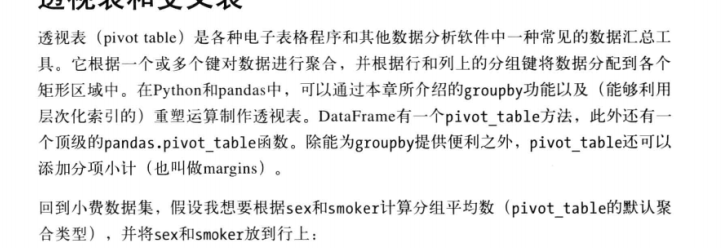

In [165]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [162]:
tips.pivot_table(index = ['sex','smoker'])  # 与groupby类似,但默认计算平局值

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [163]:
# 假设只聚合某几列
tips.pivot_table(['tip','tip_pct'], index = ['sex','day'],columns='smoker')

tip             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   3.125000  2.682857  0.165296  0.209129
       Sat   2.724615  2.868667  0.147993  0.163817
       Sun   3.329286  3.500000  0.165710  0.237075
       Thur  2.459600  2.990000  0.155971  0.163073
Male   Fri   2.500000  2.741250  0.138005  0.144730
       Sat   3.256563  2.879259  0.162132  0.139067
       Sun   3.115349  3.521333  0.158291  0.173964
       Thur  2.941500  3.058000  0.165706  0.164417

In [164]:
# margins = True可以为表添加分项小计,all为所有组的平均数，不单独考虑某一组
tips.pivot_table(['tip','tip_pct'], index = ['sex','day'],columns='smoker',margins=True)

tip                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   3.125000  2.682857  2.781111  0.165296  0.209129  0.199388
       Sat   2.724615  2.868667  2.801786  0.147993  0.163817  0.156470
       Sun   3.329286  3.500000  3.367222  0.165710  0.237075  0.181569
       Thur  2.459600  2.990000  2.575625  0.155971  0.163073  0.157525
Male   Fri   2.500000  2.741250  2.693000  0.138005  0.144730  0.143385
       Sat   3.256563  2.879259  3.083898  0.162132  0.139067  0.151577
       Sun   3.115349  3.521333  3.220345  0.158291  0.173964  0.162344
       Thur  2.941500  3.058000  2.980333  0.165706  0.164417  0.165276
All          2.991854  3.008710  2.998279  0.159328  0.163196  0.160803

In [170]:
# 使用其他聚合函数，可使用aggfunc方法,例如计算各分组的个数
tips.pivot_table('tip_pct', index = ['sex','day'],columns='smoker',margins=True,aggfunc='count')

smoker          No   Yes    All
sex    day                     
Female Fri     2.0   7.0    9.0
       Sat    13.0  15.0   28.0
       Sun    14.0   4.0   18.0
       Thur   25.0   7.0   32.0
Male   Fri     2.0   8.0   10.0
       Sat    32.0  27.0   59.0
       Sun    43.0  15.0   58.0
       Thur   20.0  10.0   30.0
All          151.0  93.0  244.0

In [174]:
# 可以使用fill_value填充缺失值
tips.pivot_table('size', index = ['time','sex','smoker'],columns='day',margins=True,aggfunc='sum',fill_value=0)

day                    Fri    Sat    Sun   Thur    All
time   sex    smoker                                  
Dinner Female No       2.0   30.0   43.0    2.0   77.0
              Yes      8.0   33.0   10.0    0.0   51.0
       Male   No       4.0   85.0  124.0    0.0  213.0
              Yes     12.0   71.0   39.0    0.0  122.0
Lunch  Female No       3.0    0.0    0.0   60.0   63.0
              Yes      6.0    0.0    0.0   17.0   23.0
       Male   No       0.0    0.0    0.0   50.0   50.0
              Yes      5.0    0.0    0.0   23.0   28.0
All                   40.0  219.0  216.0  152.0  627.0

## 交叉表
专门用于计算分组频率的**特殊透视表**

In [176]:
pd.crosstab([tips.time,tips.day],tips.smoker,margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244